<a href="https://colab.research.google.com/github/singwang-cn/Hajimeteno_pr/blob/master/ex4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
from sklearn import datasets
import torch

In [0]:
iris_data = datasets.load_iris()

x = torch.tensor([iris_data.data[:, 2], iris_data.data[:, 3]]).float()
n = x.size()[1]
u = torch.tensor([[x[0].mean()], [x[1].mean()]])
sigma = (x-u).mm((x-u).t()) / n

x_regula_0 = (x - u)[0] / (sigma[0, 0] ** .5)
x_regula_1 = (x - u)[1] / (sigma[1, 1] ** .5)

In [0]:
#compute the eigenvlue and eigenvector of matrix sigma
#s is the rotation matrix


In [0]:
s = sigma.eig(eigenvectors = True)[1]
s = s.mm(torch.tensor([[1,0],[0,-1]]).float())#adjust to the sample in text
lam = s.inverse().mm(sigma.mm(s))
#s_eigenvalue = sigma.eig(eigenvectors = True)[0][:,0]
#lam = torch.tensor([[1,0],[0,1]])*(s_eigenvalue)

In [0]:
#make the data no corralative

In [0]:
x_noco = s.inverse().mm(x)

In [0]:
#visualization

Text(0, 0.5, 'width of iris')

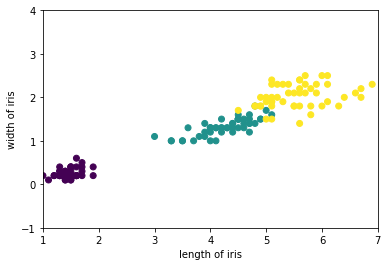

In [63]:
species = iris_data.target#set color for each kind of species

plt.figure('Before regularization')
plt.xlim(1,7)
plt.ylim(-1,4)
plt.scatter(x[0], x[1], c = species)
plt.xlabel('length of iris')
plt.ylabel('width of iris')

Text(0, 0.5, 'width of iris')

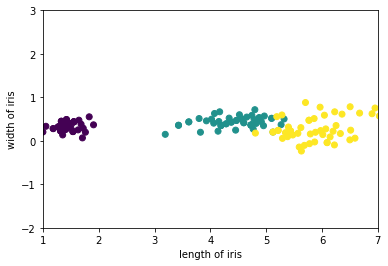

In [64]:
plt.figure('After decorrelation')
plt.scatter(x_noco[0], x_noco[1], c = species)
plt.xlim(1,7)
plt.ylim(-2,3)
plt.xlabel('length of iris')
plt.ylabel('width of iris')